# Insights from IMDB and Movie_Metadata Datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df_i = pd.read_csv('imdb.csv',escapechar = "\\")
df_m = pd.read_csv('movie_metadata.csv')

In [3]:
#df = df_i
df = df_m

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [19]:
df.shape

(5043, 28)

>The below histogram for duration tells us that the most movies are 100 - 130 minutes long.

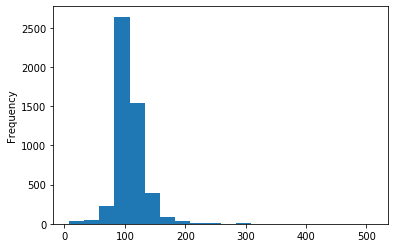

In [22]:
df['duration'].plot(kind = 'hist',bins = 20)

In [26]:
df_c = df[['content_rating','movie_title']].groupby('content_rating')['movie_title'].count().rename("title_count").reset_index()

>This tells us the most movies are rated Restricted (R) 

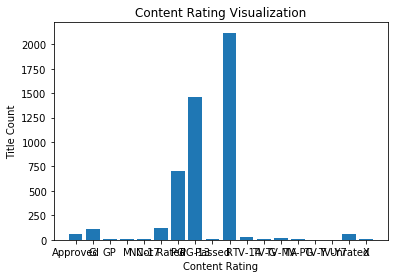

In [28]:
#Content Rating Visualization
plt.bar(df_c['content_rating'],df_c['title_count'])
plt.xlabel('Content Rating')
plt.ylabel('Title Count')
plt.title('Content Rating Visualization')
plt.show()

>Below table show the top rated movie in each genre and genre combination

In [30]:
df.sort_values('imdb_score', ascending=False).groupby('genres')['movie_title','imdb_score'].first()

,movie_title,imdb_score
genres,,
Action,Kickboxer: Vengeance,9.1
Action|Adventure,Raiders of the Lost Ark,8.5
Action|Adventure|Animation|Comedy|Crime|Family|Fantasy,Osmosis Jones,6.2
Action|Adventure|Animation|Comedy|Drama|Family|Fantasy|Thriller,Alpha and Omega 4: The Legend of the Saw Tooth...,6.0
Action|Adventure|Animation|Comedy|Drama|Family|Sci-Fi,The Iron Giant,8.0
...,...,...
Sci-Fi|Thriller,Blade Runner,8.2
Thriller,Frenzy,7.5
Thriller|War,The Train,7.9


>This tells us that if the movie duration is below 130 minutes it’s more likely to receive a rating.

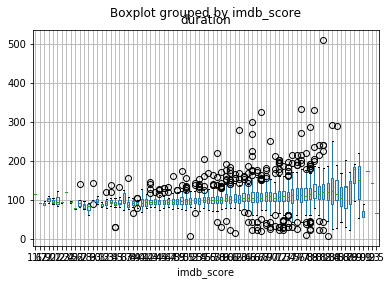

In [31]:
df.boxplot(column='duration', by='imdb_score')